In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data1 = pd.read_csv("AcademicData.csv");

Basic Stats

In [81]:
data1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [82]:
data1.describe()

,math score,reading score,writing score
count,957.000000,994.000000,991.000000
mean,66.323929,68.008048,69.487386
std,18.280119,16.602270,29.563757
min,-89.000000,3.000000,10.000000
25%,57.000000,58.000000,57.000000
50%,66.000000,69.500000,69.000000
75%,77.000000,79.000000,79.000000
max,334.000000,100.000000,567.000000


In [83]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   957 non-null    float64
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [84]:
data1.shape

(1000, 8)

Removing null values

In [85]:
data1.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [86]:
data1["math score"].fillna( data1["math score"].median() , inplace = True )

In [87]:
data1["reading score"].fillna( data1["reading score"].mean() , inplace = True )

In [88]:
data1["writing score"].fillna( data1["writing score"].median() , inplace = True )

In [89]:
data1.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

convert into appropriate dataType

In [90]:
data1["math score"] = data1["math score"].astype("int64")

In [91]:
data1["reading score"] = data1["reading score"].astype("int64")

In [92]:
data1["writing score"] = data1["writing score"].astype("int64")

In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Detecting Outlier

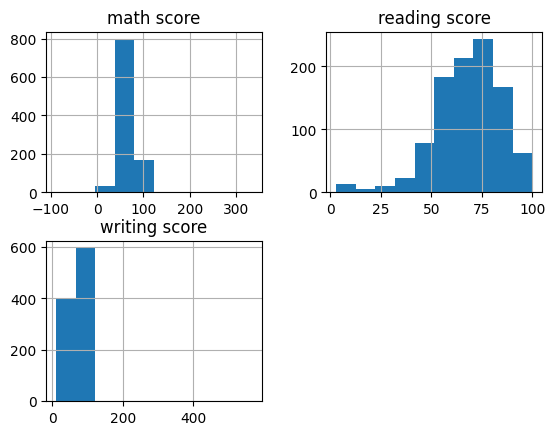

In [94]:
data1.hist()
plt.show()

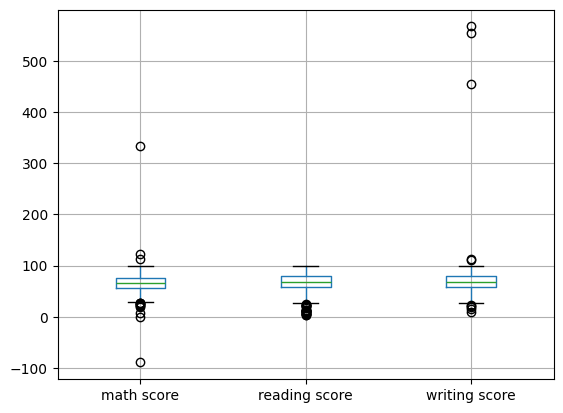

In [95]:
data1.boxplot()
plt.show()

In [96]:
def IQRApproach( col , data  ):
    q1 = data[col ].quantile(0.25)
    q3 = data[col ].quantile(0.75)
    iqr = q3 - q1 
    upperl = q3 + iqr 
    lowerl = q1 - iqr 
    print( "q1 : " , q1 , " q3 : " ,  q3 )
    data[ col ] = np.where(  data[ col ] > upperl , upperl , np.where(
        data[ col ] < lowerl , lowerl , data[col]
    ))
    

In [97]:
IQRApproach( "math score" , data1)

q1 :  57.0  q3 :  76.0


In [98]:
IQRApproach( "reading score" , data1)

q1 :  58.0  q3 :  79.0


In [99]:
IQRApproach( "writing score" , data1)

q1 :  58.0  q3 :  79.0


Applying transformation

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [106]:
dataArr = scaler.fit_transform(data1.loc[ : , [ "math score",  "reading score" , "writing score" ] ])

In [108]:
dataArr = pd.DataFrame( dataArr , columns = [ "math score",  "reading score" , "writing score" ]  )

In [109]:
dataArr

,math score,reading score,writing score
0,0.596491,0.555556,0.587302
1,0.543860,0.841270,0.809524
2,0.912281,0.920635,0.888889
3,0.157895,0.317460,0.111111
4,0.666667,0.650794,0.603175
...,...,...,...
995,0.877193,0.984127,0.920635
996,0.421053,0.285714,0.285714
997,0.368421,0.539683,0.444444
998,0.526316,0.650794,0.634921


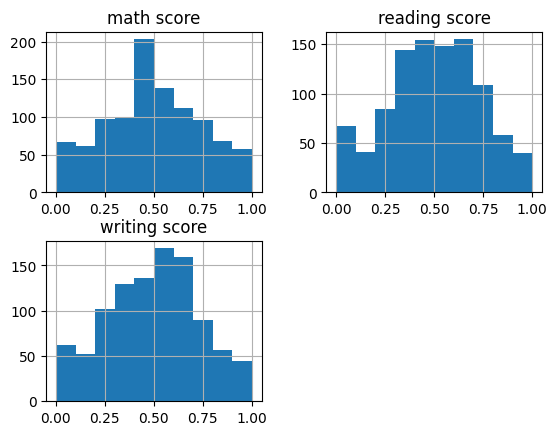

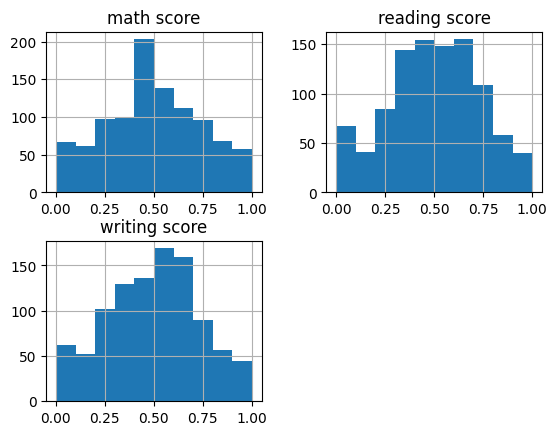

In [116]:
dataArr.hist()
plt.show()